# Question 1

In [1]:
import csv

In [2]:
# key: Name
# value: Sector 
NameSectorDict = {}
csv_reader = csv.reader(open('./finance_data/Name_sector.csv', encoding='utf-8'))
for row in csv_reader:
    if row[0] == 'Symbol':
        continue
    else:
        NameSectorDict[row[0]] = row[1]

In [3]:
print (len(NameSectorDict))

505


In [4]:
root_dir = './finance_data/data/'

### NamePriceDict: $p_i(t)$ is the closing price of stock $i$ at the $t^{th}$ day    

In [5]:
# key: Name
# value: a list of [date, closing price]
NamePriceDict = {}
for name in NameSectorDict:
    file = root_dir + name + '.csv'
    csv_reader = csv.reader(open(file, encoding='utf-8'))
    for row in csv_reader:
        if row[0] == 'Date':
            continue
        else:
            if name in NamePriceDict:
                NamePriceDict[name].append((row[0], eval(row[4])))
            else:
                NamePriceDict[name] = [(row[0], eval(row[4]))]

In [6]:
print (len(NamePriceDict['ADI']))

765


In [7]:
exceptions = []
for name in NamePriceDict:
    if len(NamePriceDict[name]) != 765:
        exceptions.append(name)

In [8]:
exceptions

['CFG',
 'CSRA',
 'FTV',
 'HPE',
 'KHC',
 'PYPL',
 'QRVO',
 'SYF',
 'UA',
 'WLTW',
 'WRK']

In [11]:
for name in NamePriceDict:
    if NamePriceDict[name][-1][0] != '2017-05-12':
        print (name)

BF.B
BRK.B


In [12]:
print(NamePriceDict['BF.B'][-1][0])
print(NamePriceDict['BRK.B'][-1][0])

5/12/17
5/12/17


### NameReturnDict: $q_i(t)$ is the return of stock $i$ over a period of $[t-1,t]$ 

In [9]:
# key: Name
# value: a list of return
NameReturnDict = {}
for name in NamePriceDict:
    if name in exceptions:
        continue
    returnList = []
    for i in range(1,len(NamePriceDict[name])):
        r = (NamePriceDict[name][i][1]-NamePriceDict[name][i-1][1])/NamePriceDict[name][i-1][1]
        returnList.append(r)
    NameReturnDict[name] = returnList

In [10]:
len(NameReturnDict)

494

In [11]:
len(NameReturnDict['A'])

764

### NameLogReturnDict: $r_i(t)$ is the log-normalized return stock $i$ over a period of $[t-1,t]$

In [12]:
import math

In [13]:
# key: Name
# value: a list of log normalized return
NameLogReturnDict = {}
for name in NameReturnDict:
    for i in NameReturnDict[name]:
        r = math.log(1+i)
        if name not in NameLogReturnDict:
            NameLogReturnDict[name] = [r]
        else:
            NameLogReturnDict[name].append(r)

In [14]:
min(NameReturnDict['A'])

-0.261215602793618

In [15]:
def average(seq):
    s = 0
    #print (seq)
    for i in seq:
        s += i
    return s/(1.0*len(seq))

In [16]:
def cal_correlation(r_i, r_j):
    if len(r_i) > len(r_j):
        r_i = r_i[len(r_i)-len(r_j):]
    elif len(r_i) < len(r_j):
        r_j = r_j[len(r_j)-len(r_i):]
    l = len(r_i)
    
    #print (len(r_i))
    #print (len(r_j))
    
    cross_product = 0
    r_i_sq = 0
    r_j_sq = 0
    
    for t in range(0, l):
        cross_product += r_i[t] * r_j[t]
        r_i_sq += r_i[t] * r_i[t]
        r_j_sq += r_j[t] * r_j[t]
    #print(cross_product)
    #print(r_i_sq)
    #print(r_j_sq)
    
    #num = sum(cross_product)/(l*1.0) - (sum(r_i)/(l*1.0))*(sum(r_j)/(l*1.0))
    #den = (sum(r_i_sq)/(l*1.0)-sum(r_i)/(l*1.0)) * (sum(r_j_sq)/(l*1.0)-sum(r_j)/(l*1.0))
    num = cross_product/(l*1.0) - average(r_i)*average(r_j);
    #print (num)
    den = (r_i_sq/(l*1.0) - (average(r_i))*(average(r_i))) * (r_j_sq/(l*1.0) - (average(r_j))*(average(r_j)))
    #print (den)
    cor = num/math.sqrt(den)
    
    return cor

In [17]:
cal_correlation(NameLogReturnDict['A'],NameLogReturnDict['AAL'])

0.29248047834550794

In [18]:
# key: (Stock_Name_i, Stock_Name_j)
# value: correlation value
corDict = {}
for name_i in NameLogReturnDict:
    for name_j in NameLogReturnDict:
        if name_i == name_j:
            continue
        elif (name_i,name_j) in corDict or (name_j, name_i) in corDict:
            continue
        else:
            corDict[(name_i,name_j)] = cal_correlation(NameLogReturnDict[name_i],NameLogReturnDict[name_j]);

In [19]:
len(corDict) #494C2 = 121771

121771

In [20]:
#Validate the upper and lower bound
min_cor = 99999999
max_cor = -99999999
for ij, cor in corDict.items():
    if cor < min_cor:
        min_cor = cor
    if cor > max_cor:
        max_cor = cor

In [21]:
print(min_cor)
print(max_cor)

-0.1985733513184207
0.9884237484135724


# Question 2  

In [28]:
import collections
import networkx as nx
import matplotlib.pyplot as plt

In [29]:
G = nx.Graph()

In [30]:
for name in NameReturnDict:
    G.add_node(name)

In [31]:
for pairs in corDict:
    #print (pairs)
    #print (corDict[pairs])
    w  = math.sqrt(2*(1-corDict[pairs]))
    G.add_edge(pairs[0], pairs[1], weight = w)

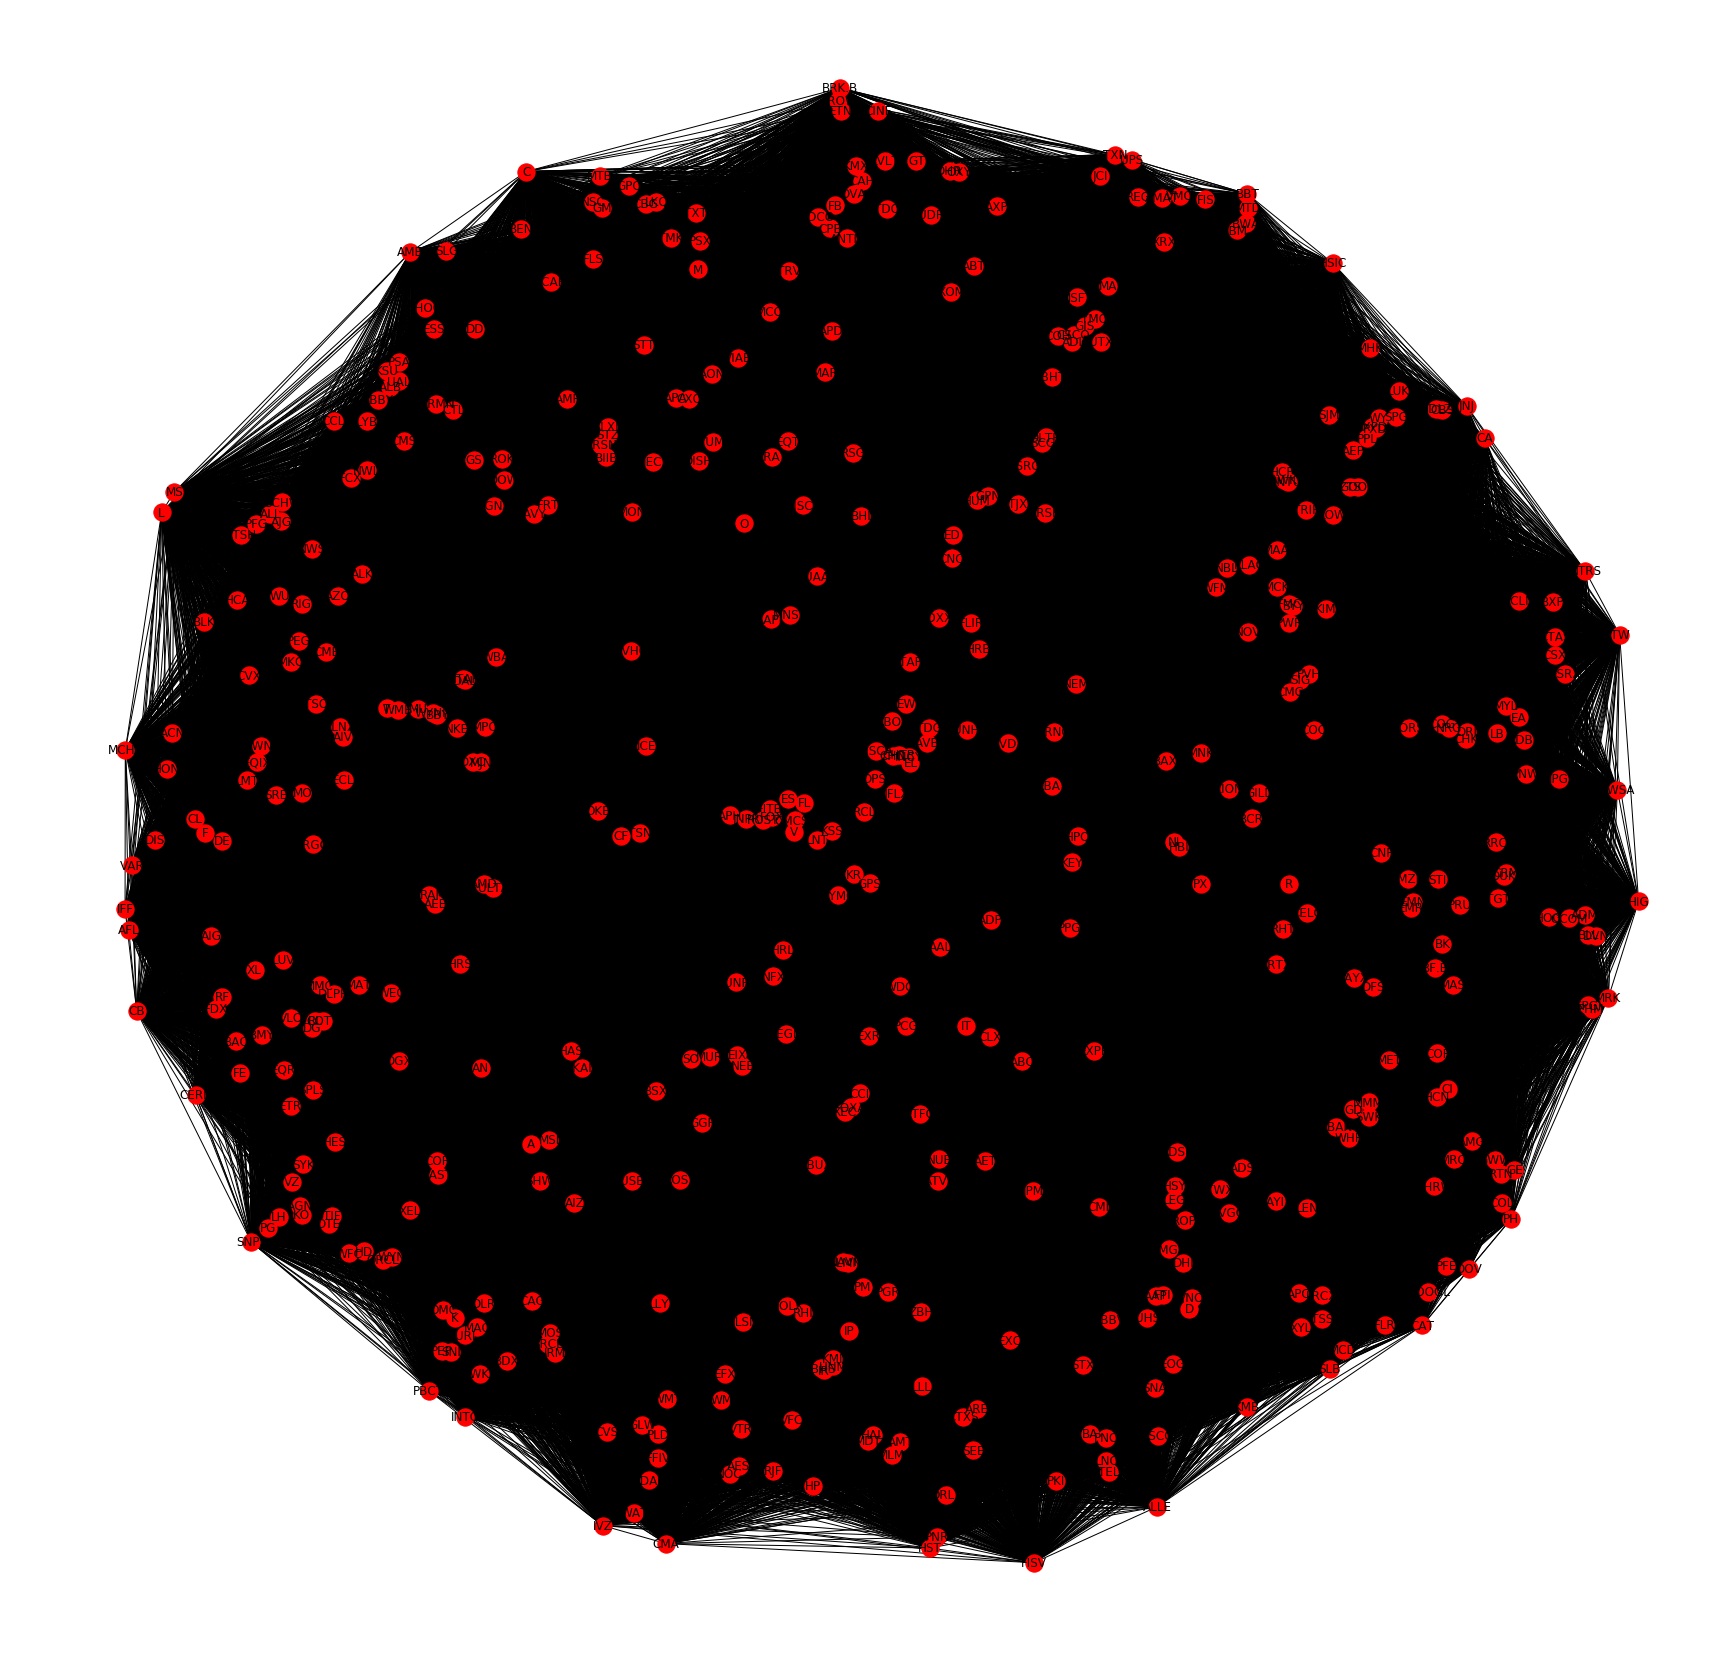

In [32]:
pos = nx.spring_layout(G)
plt.figure(figsize=(30,30))
plt.axis('off')
nx.draw_networkx(G,pos,with_labels = True)
plt.show()

### Plot the degree distribution of the correlation graph 

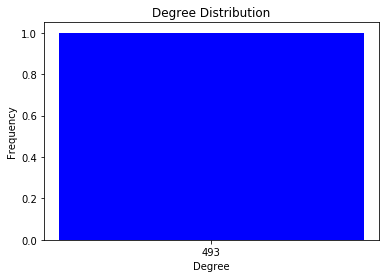

In [33]:
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print ("Degree sequence", degree_sequence)

degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
fre = cnt[0]/sum(cnt)

fig, ax = plt.subplots()
plt.bar(deg, fre, width=0.80, color='b')

plt.title("Degree Distribution")
plt.ylabel("Frequency")
plt.xlabel("Degree")
ax.set_xticks([d for d in deg])

In [34]:
cnt

(494,)

In [35]:
edge_weights = []
for (u, v, d) in G.edges(data=True):
    #print (d['weight'])
    edge_weights.append(d['weight'])

Text(0.5,1,'Distribution of edge weights')

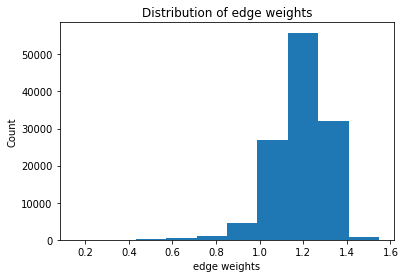

In [36]:
plt.hist(edge_weights)
plt.xlabel('edge weights')
plt.ylabel('Count')
plt.title('Distribution of edge weights')

# Question 3

In [38]:
# add sector info to nodes
sectorlist = []
for name in NameReturnDict:
    G.nodes[name]['sector'] = NameSectorDict[name]
    if NameSectorDict[name] not in sectorlist:
        sectorlist.append(NameSectorDict[name])

In [39]:
sectorlist

['Health Care',
 'Industrials',
 'Consumer Discretionary',
 'Information Technology',
 'Consumer Staples',
 'Utilities',
 'Financials',
 'Real Estate',
 'Materials',
 'Energy',
 'Telecommunication Services']

In [40]:
T = nx.minimum_spanning_tree(G)

In [41]:
len(T.edges())

493

In [42]:
from itertools import count
mapping = dict(zip(sorted(sectorlist),count()))
nodes = T.nodes()
colors = [mapping[T.nodes[n]['sector']] for n in nodes]

In [43]:
mapping

{'Consumer Discretionary': 0,
 'Consumer Staples': 1,
 'Energy': 2,
 'Financials': 3,
 'Health Care': 4,
 'Industrials': 5,
 'Information Technology': 6,
 'Materials': 7,
 'Real Estate': 8,
 'Telecommunication Services': 9,
 'Utilities': 10}

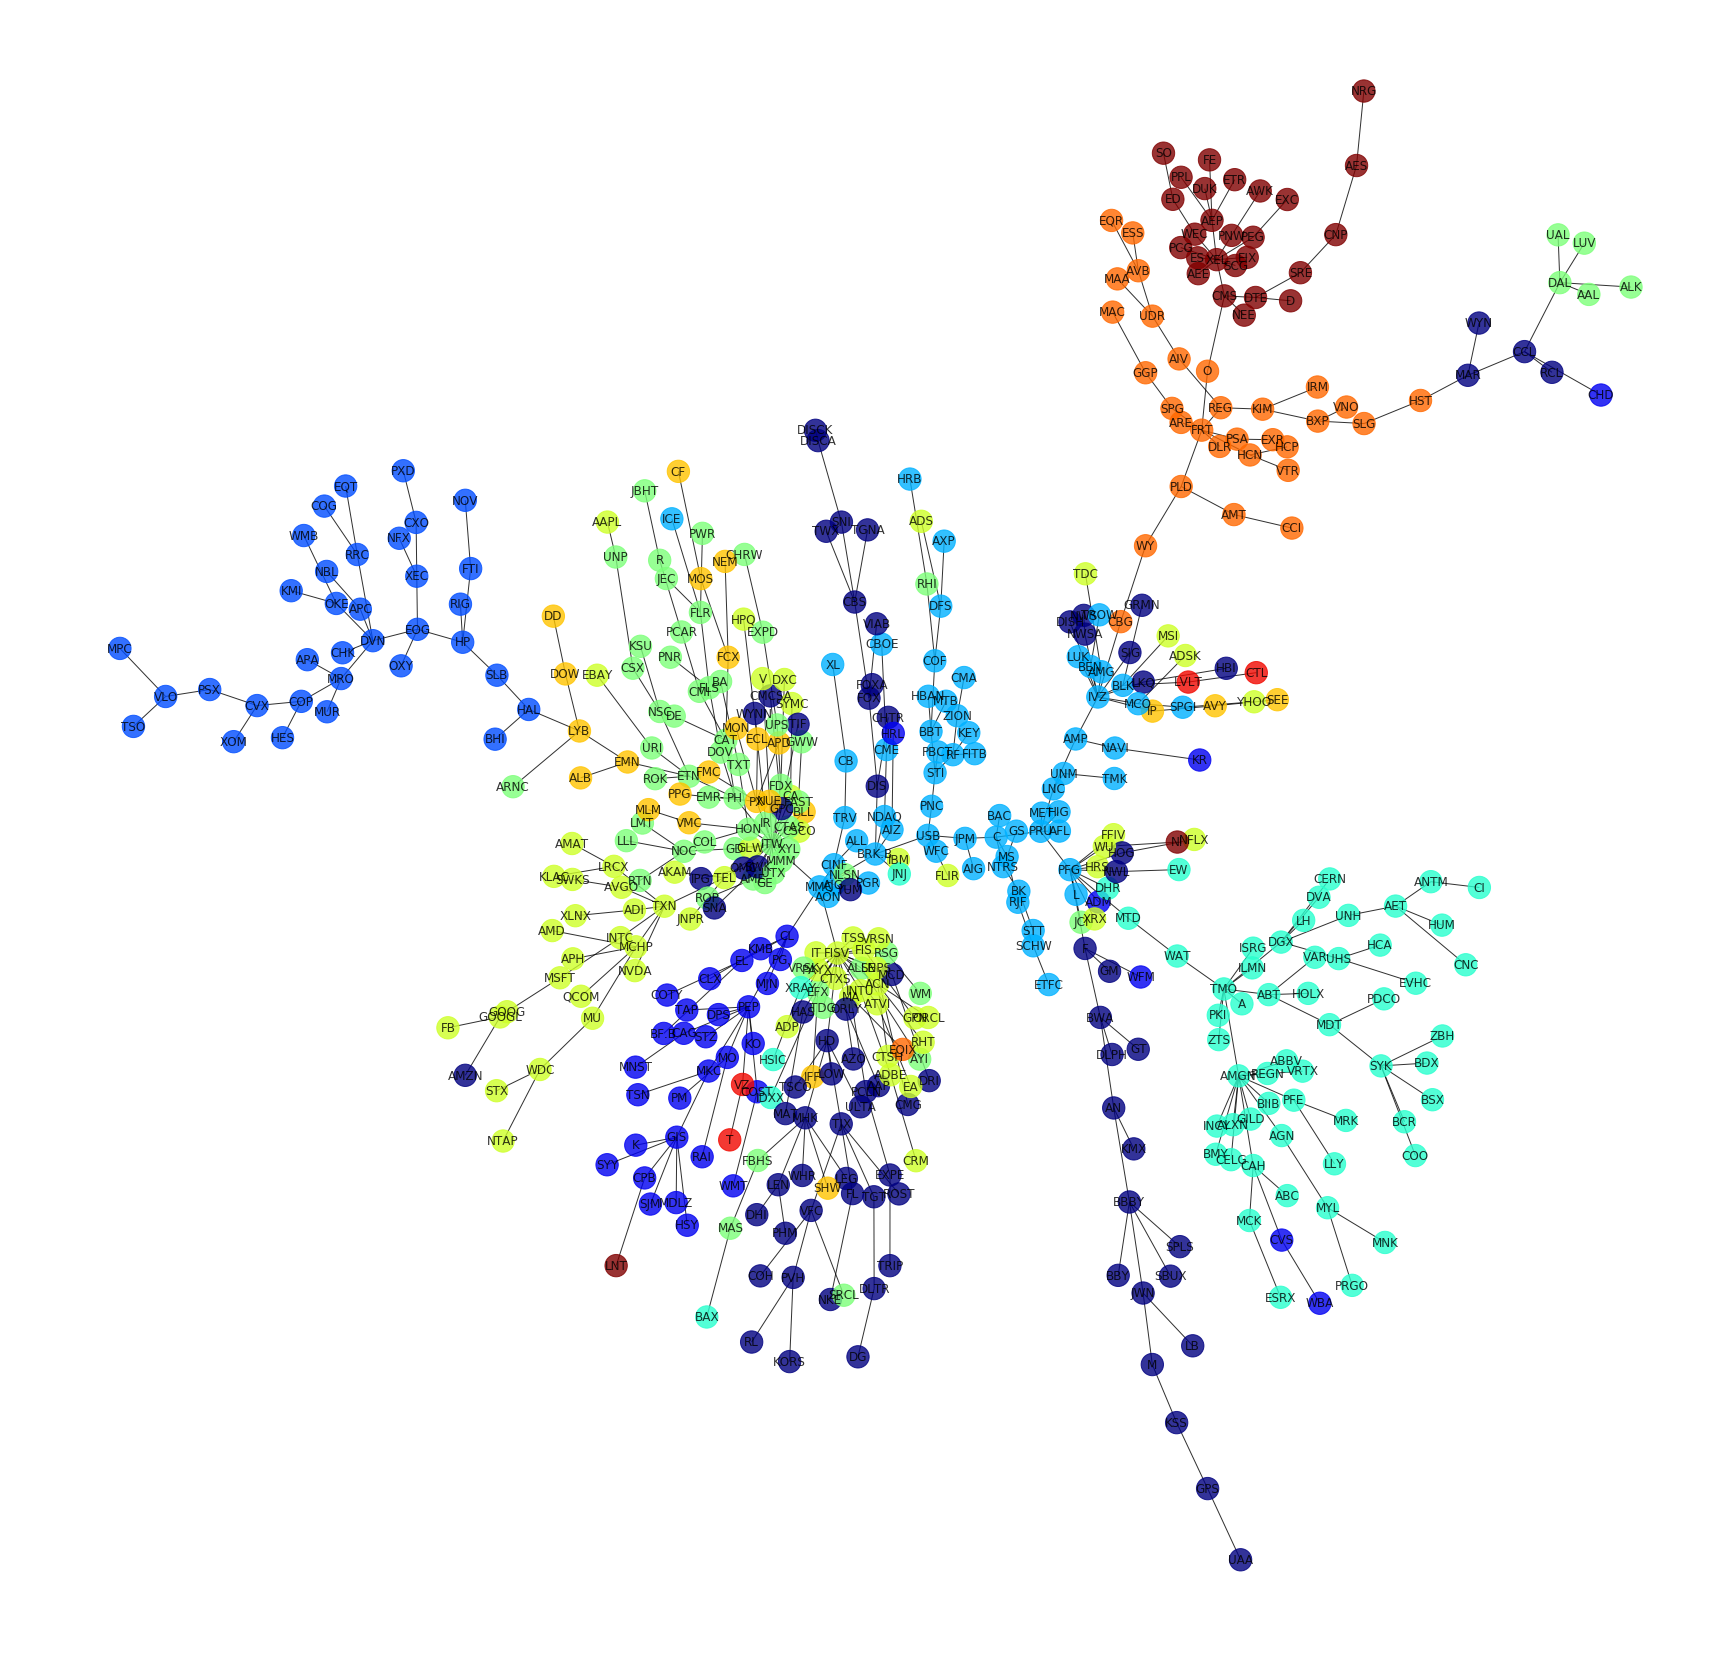

In [44]:
pos = nx.kamada_kawai_layout(T)
plt.figure(figsize=(30,30))
plt.axis('off')
nx.draw_networkx(T, pos, with_labels = True, alpha = 0.8,
                 nodelist=nodes, node_color=colors, node_size=500, cmap=plt.cm.jet)
plt.show()

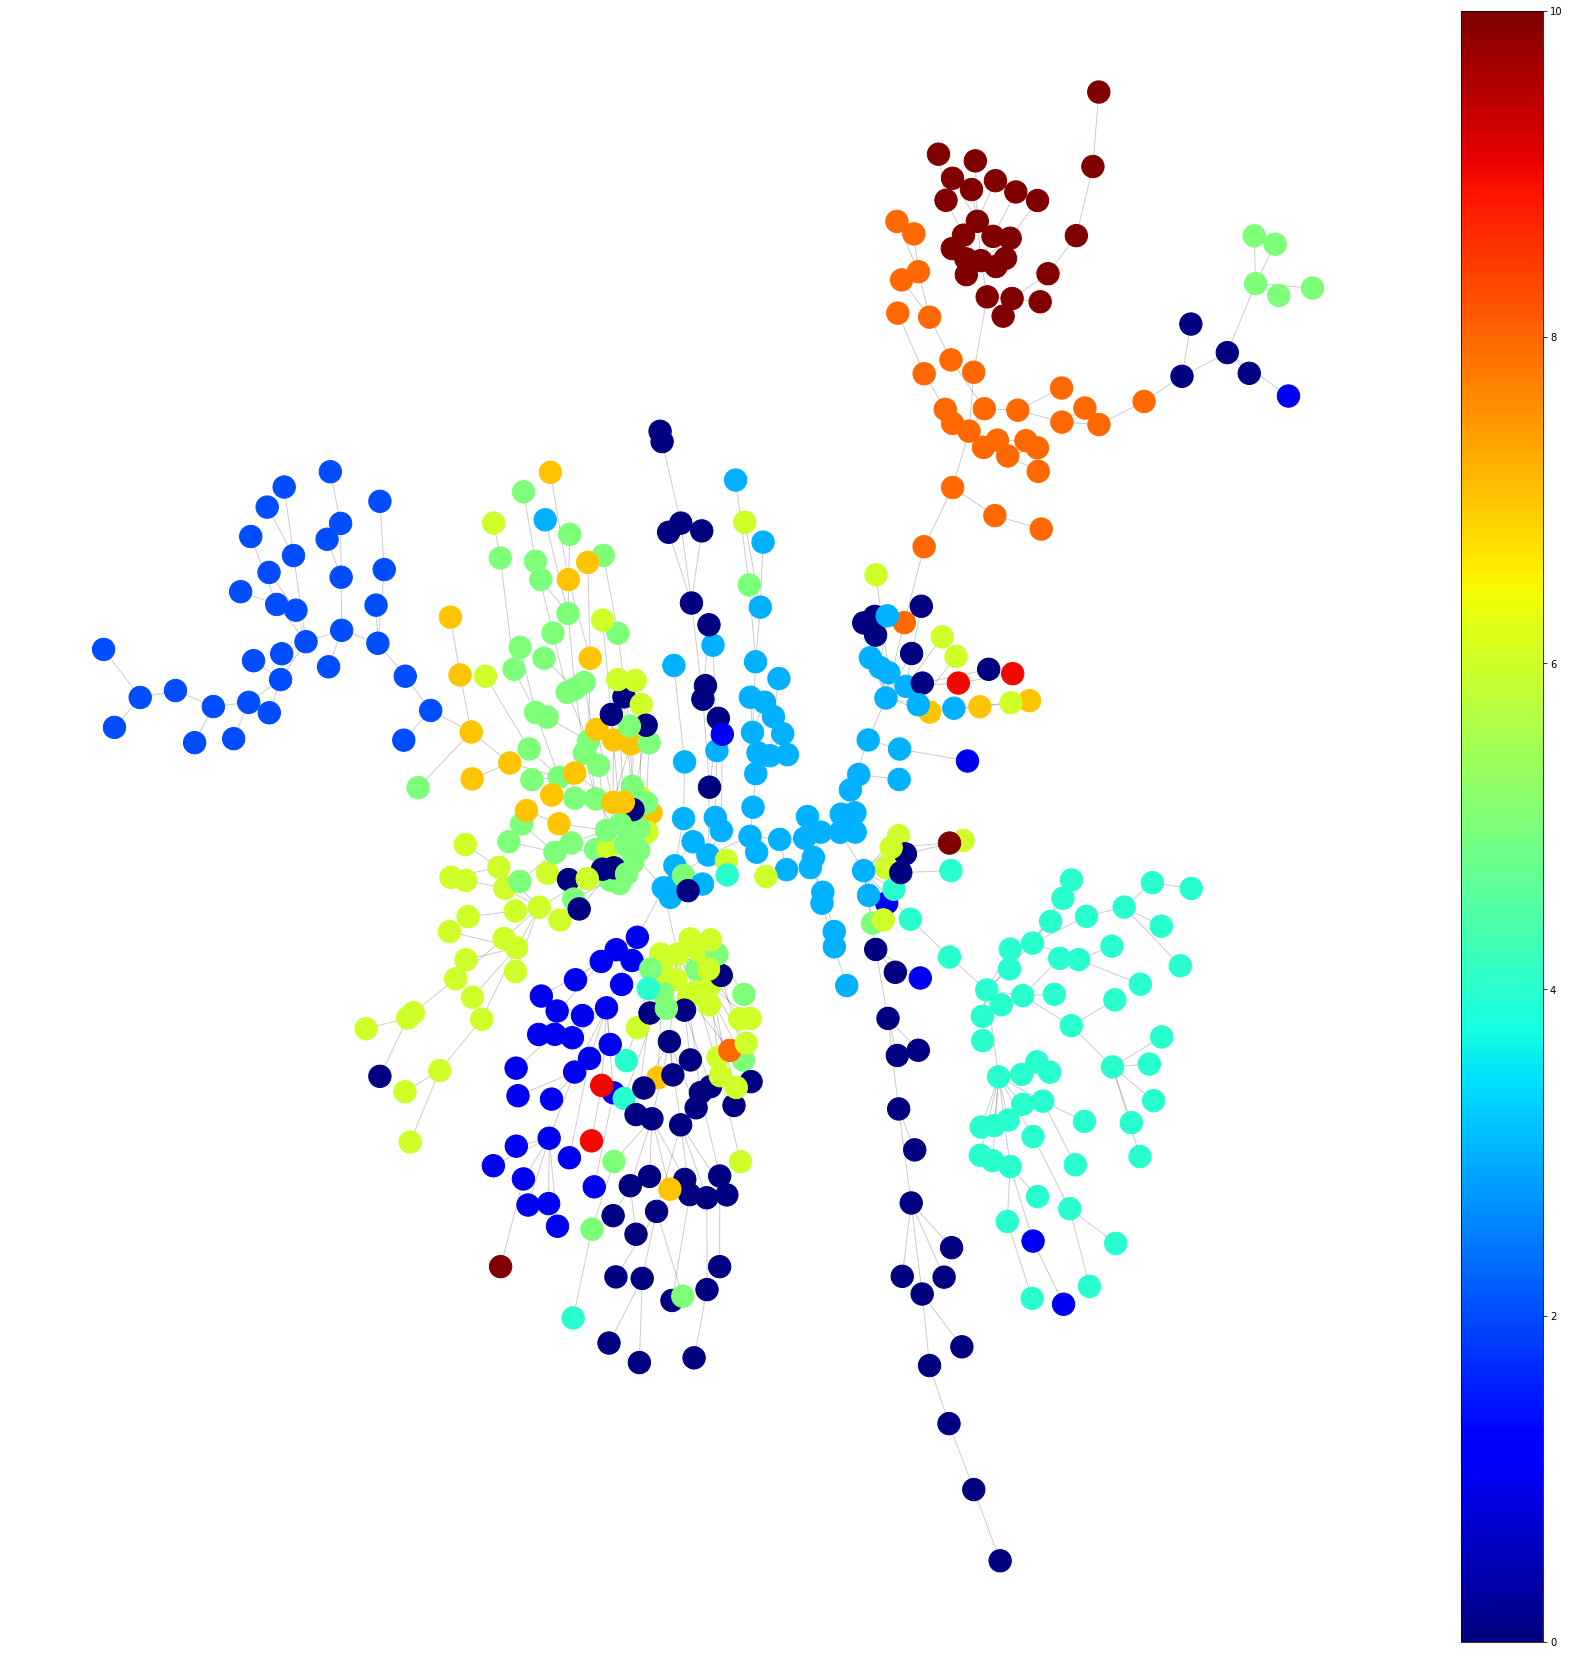

In [45]:
pos = nx.kamada_kawai_layout(T)
plt.figure(figsize=(30,30))
plt.axis('off')
ec = nx.draw_networkx_edges(T, pos, alpha=0.2)
nc = nx.draw_networkx_nodes(T, pos, with_labels = True, nodelist=nodes, node_color=colors, node_size=500, cmap=plt.cm.jet)
plt.colorbar(nc)
plt.show()

# Question 4

In [42]:
Vcount = len(T)
Vcount

505

### First method: $P(v_i \in S_i) = \frac{Q_i}{N_i}$ 

In [44]:
alpha_1_sum = 0
for vi in T.nodes():
    N = 0
    Q = 0
    for ni in T[vi]: # ni reprents the vi's neighbors
        N += 1
        if T.nodes[ni]['sector'] == T.nodes[vi]['sector']:
            Q += 1
    alpha_1_sum += Q/(1.0*N)

In [45]:
alpha_1 = alpha_1_sum/(1.0*Vcount)
alpha_1

0.8212484540379505

### Second method: $P(v_i \in S_i) = \frac{|S_i|}{|V|}$ 

In [47]:
Si_count = [0]*11
for vi in T.nodes():
    Si = T.nodes[vi]['sector']
    Si_count[mapping[Si]] += 1

In [48]:
Si_count

[85, 37, 34, 66, 60, 65, 70, 25, 31, 4, 28]

In [49]:
for i in range(0,len(Si_count)):
    Si_count[i] = Si_count[i]/(1.0*Vcount)

In [50]:
Si_count

[0.16831683168316833,
 0.07326732673267326,
 0.06732673267326733,
 0.1306930693069307,
 0.1188118811881188,
 0.12871287128712872,
 0.13861386138613863,
 0.04950495049504951,
 0.061386138613861385,
 0.007920792079207921,
 0.055445544554455446]

In [51]:
alpha_2_sum = 0
for vi in T.nodes():
    Si = T.nodes[vi]['sector']
    alpha_2_sum += Si_count[mapping[Si]]
alpha_2 = alpha_2_sum/(1.0*Vcount)
alpha_2

0.11456523870208775